In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mutual_info_score 
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from xgboost import plot_importance
from pylab import rcParams

# Data understanding

In [2]:
dataset = pd.read_csv('C://Users//USER//Desktop//train.csv')

In [3]:
dataset.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [4]:
dataset.shape

(59381, 128)

In [5]:
dataset.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
                        ...   
Medical_Keyword_20       int64
Medical_

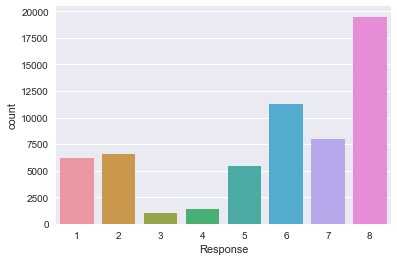

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(dataset['Response'], data=dataset)

In [6]:
np.corrcoef(dataset['Ht'], dataset['BMI'])

array([[ 1.        ,  0.12312475],
       [ 0.12312475,  1.        ]])

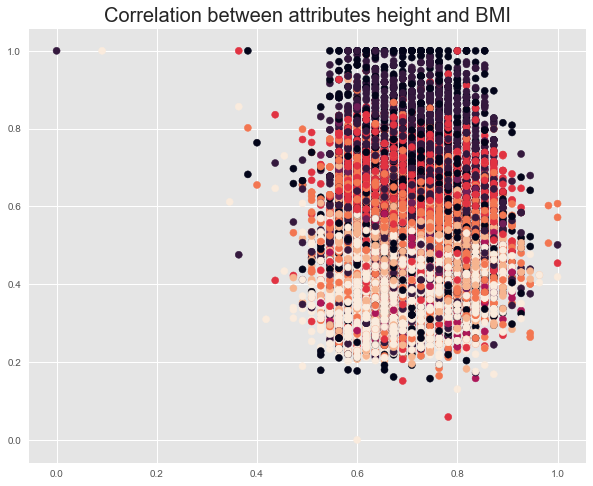

In [7]:
%matplotlib inline
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,8))         #figsize in inches
plt.title("Correlation between attributes height and BMI", fontsize=20)
plt.scatter(dataset['Ht'], dataset['BMI'],c = dataset['Response']) 
plt.show() 

In [9]:
np.corrcoef(dataset['Ins_Age'], dataset['BMI'])

array([[ 1.       ,  0.1370757],
       [ 0.1370757,  1.       ]])

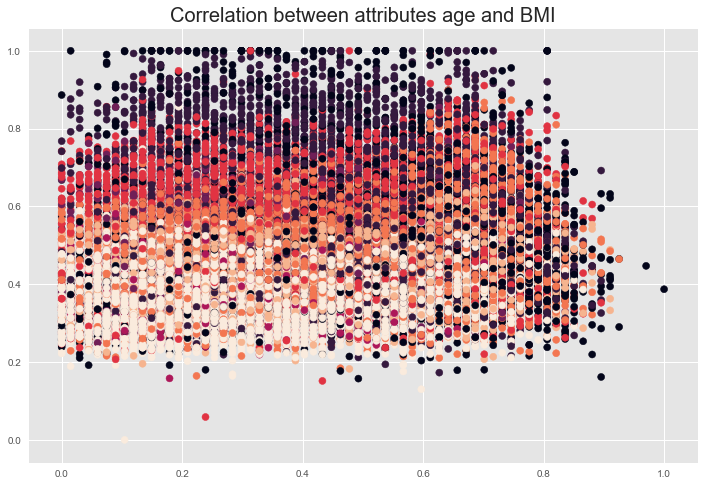

In [32]:
%matplotlib inline
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,8)) # Sample figsize in inches
plt.title("Correlation between attributes age and BMI",fontsize=20)
plt.scatter(dataset['Ins_Age'], dataset['BMI'], c = dataset['Response'])
plt.show()

In [10]:
np.corrcoef(dataset['Wt'], dataset['BMI'])

array([[ 1.        ,  0.85408334],
       [ 0.85408334,  1.        ]])

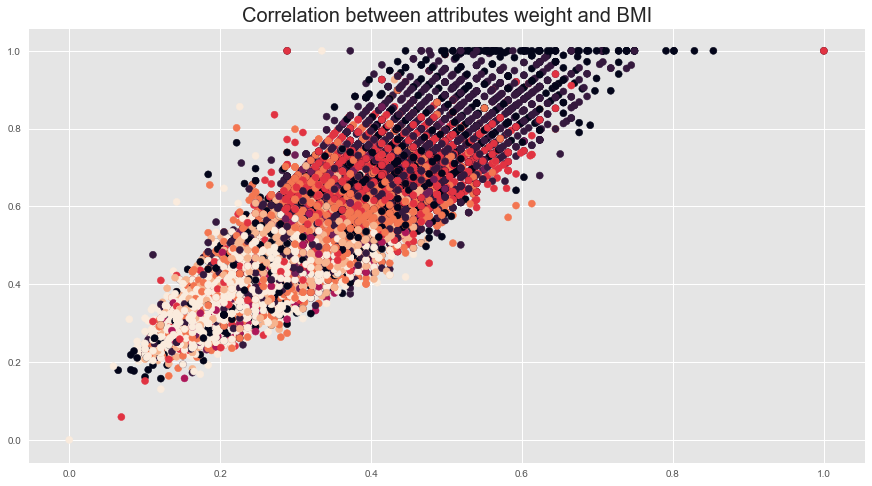

In [33]:
%matplotlib inline
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,8)) 
plt.title("Correlation between attributes weight and BMI", fontsize=20)
plt.scatter(dataset['Wt'], dataset['BMI'], c = dataset['Response'])
plt.show()

In [5]:
corr_matrix = dataset.corr().abs() 

In [14]:
print(corr_matrix) 

                           Id  Product_Info_1  Product_Info_3  Product_Info_4  \
Id                   1.000000        0.002870        0.001869        0.002914   
Product_Info_1       0.002870        1.000000        0.027573        0.059829   
Product_Info_3       0.001869        0.027573        1.000000        0.048775   
Product_Info_4       0.002914        0.059829        0.048775        1.000000   
Product_Info_5       0.004195        0.069720        0.025419        0.040433   
Product_Info_6       0.005038        0.078684        0.018855        0.089075   
Product_Info_7       0.002117        0.012169        0.015581        0.051542   
Ins_Age              0.001764        0.077429        0.001005        0.261356   
Ht                   0.003674        0.052720        0.293546        0.141780   
Wt                   0.005648        0.004035        0.213546        0.028041   
BMI                  0.004287        0.037130        0.083288        0.129369   
Employment_Info_1    0.00487

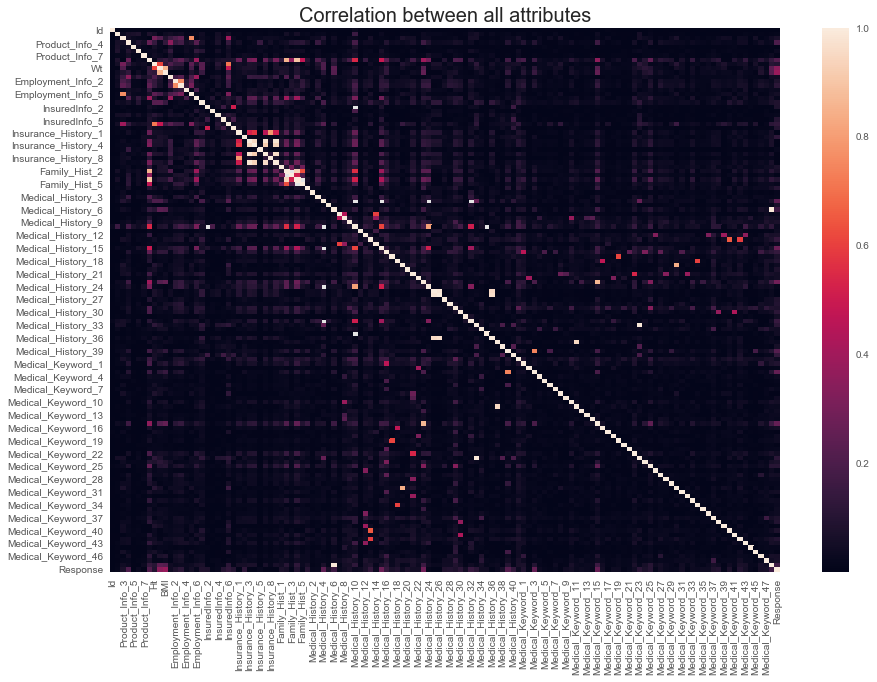

In [8]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
plt.title("Correlation between all attributes", fontsize=20)
sns.heatmap(data=corr_matrix)

In [7]:
corr_matrix1 = dataset.corr().abs() 

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
os = (corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of os series is the pair with the bigest correlation

In [8]:
os.nlargest(10)

Medical_History_6    Medical_Keyword_48     0.993101
Medical_History_33   Medical_Keyword_23     0.993030
Medical_History_25   Medical_History_26     0.987910
Insurance_History_3  Insurance_History_9    0.982598
                     Insurance_History_7    0.974910
Medical_History_26   Medical_History_36     0.965349
Insurance_History_7  Insurance_History_9    0.962528
Medical_History_25   Medical_History_36     0.954110
Medical_History_37   Medical_Keyword_11     0.950069
Insurance_History_3  Insurance_History_4    0.949388
dtype: float64

In [16]:
pd.crosstab(dataset['Medical_History_6'], dataset['Medical_Keyword_48'])

Medical_Keyword_48,0,1
Medical_History_6,,
1,37,3231
2,2,0
3,56106,5


In [17]:
pd.crosstab(dataset['Medical_History_33'], dataset['Medical_Keyword_23'])

Medical_Keyword_23,0,1
Medical_History_33,,
1,34,5767
3,53541,39


In [18]:
pd.crosstab(dataset['Medical_History_25'], dataset['Medical_History_26'])

Medical_History_26,1,2,3
Medical_History_25,,,
1,0,0,48040
2,3,11101,1
3,0,236,0


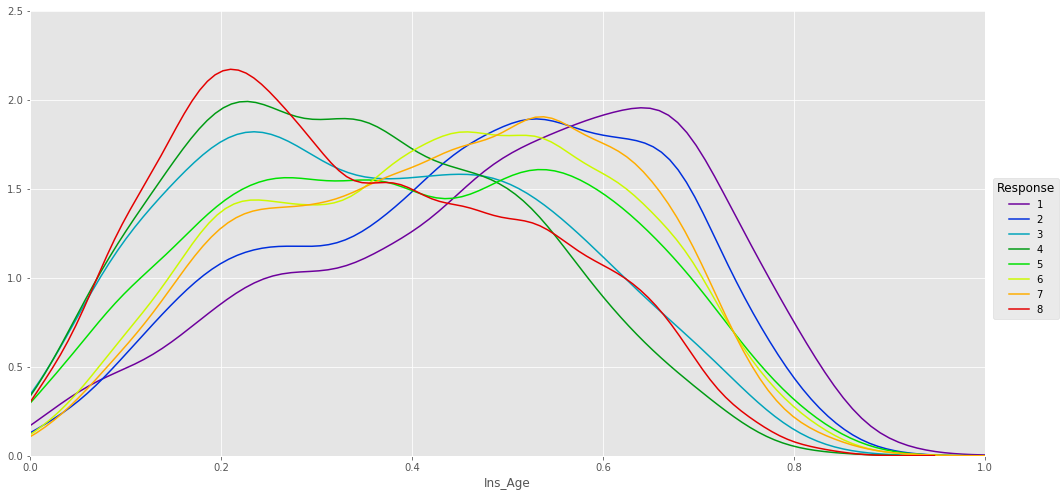

In [40]:
facet = sns.FacetGrid(dataset, hue="Response",aspect=2, size = 7 ,hue_order=[1,2,3,4,5,6,7,8], palette="nipy_spectral") #RdBu 
facet.map(sns.kdeplot,'Ins_Age')
facet.set(xlim=(0, dataset['Ins_Age'].max()), ylim=(0,2.5))
facet.add_legend()
facet.set_titles('Relationship between age and response')

In [ ]:
employment_info_N Response relation

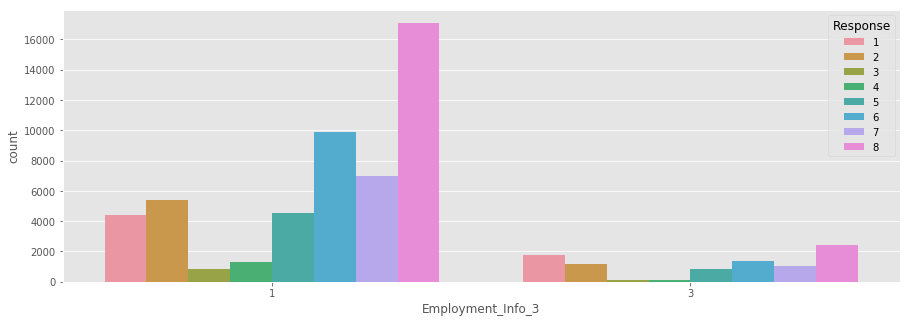

In [54]:
#employment_info_3,5
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='Employment_Info_3', hue="Response", data=dataset, ax=axis1, hue_order=[1,2,3,4,5,6,7,8])

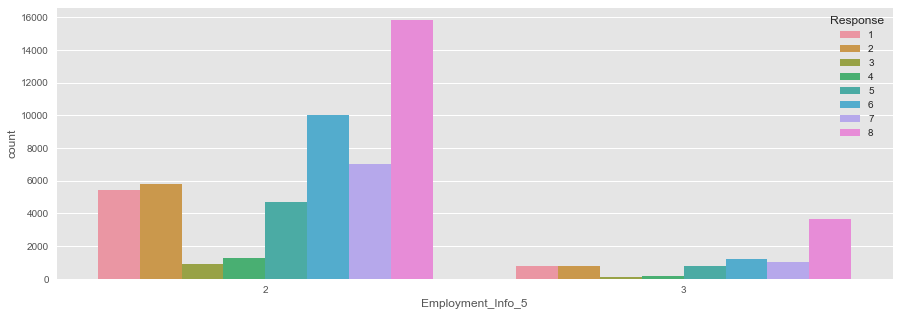

In [66]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='Employment_Info_5', hue="Response", data=dataset, ax=axis1, hue_order=[1,2,3,4,5,6,7,8])

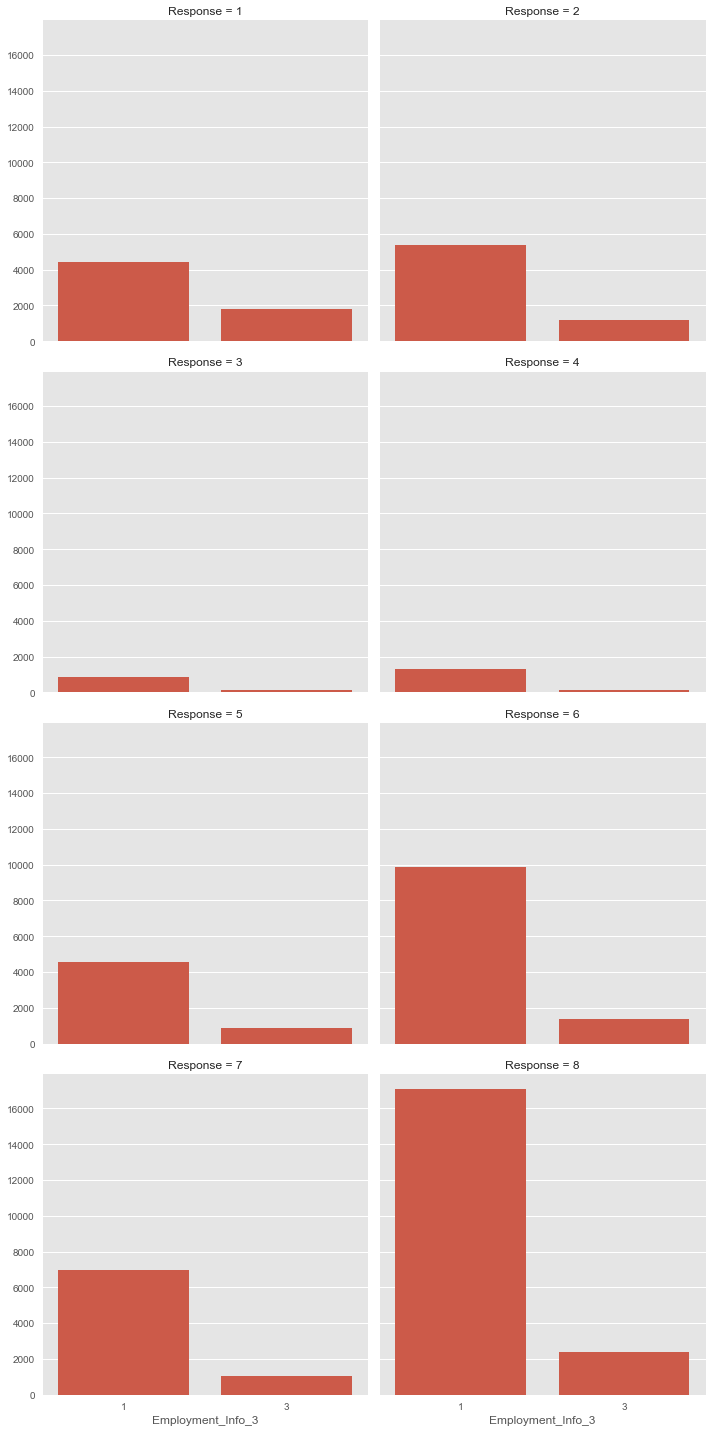

In [70]:
g = sns.FacetGrid(dataset, col="Response", col_wrap=2, 
                  size=5, )
g.map(sns.countplot, "Employment_Info_3")

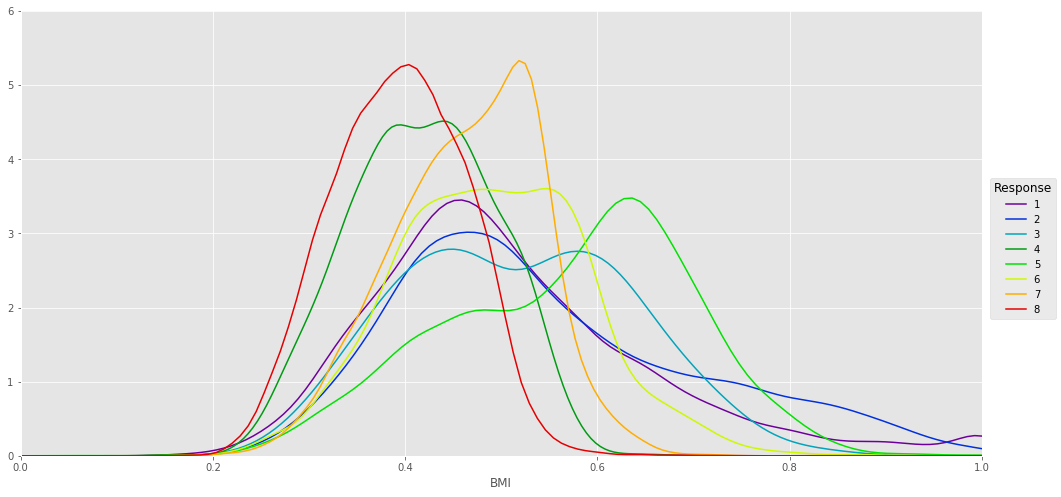

In [74]:
#BMI FacetGrid
facet = sns.FacetGrid(dataset, hue="Response",aspect=2, size=7, hue_order=[1,2,3,4,5,6,7,8], palette="nipy_spectral")
facet.map(sns.kdeplot,'BMI')
facet.set(xlim=(0, 1.0), ylim=(0,6))
facet.add_legend()

[(0, 1.1)]

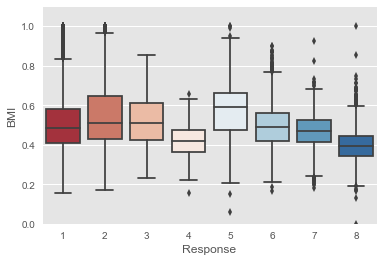

In [76]:
#BMI boxplot
ax = sns.boxplot(x="Response", y="BMI", data=dataset, 
                 order=[1,2,3,4,5,6,7,8], palette="RdBu")
ax.set(ylim=(0, 1.1))

In [140]:
# Feature selection of categorical variables 
# Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7
print('Values for product info 1 :{}'.format(dataset.Product_Info_1.unique().shape))
print('Values for product info 2 :{}'.format(dataset.Product_Info_2.unique().shape))
print('Values for product info 3 :{}'.format(dataset.Product_Info_3.unique().shape))
print('Values for product info 5 :{}'.format(dataset.Product_Info_5.unique().shape))
print('Values for product info 6 :{}'.format(dataset.Product_Info_6.unique().shape))
print('Values for product info 7 :{}'.format(dataset.Product_Info_7.unique().shape))
print('Values for Medical history 15 :{}'.format(dataset.Medical_History_15.unique().shape))

Values for product info 1 :(2,)
Values for product info 2 :(19,)
Values for product info 3 :(34,)
Values for product info 5 :(2,)
Values for product info 6 :(2,)
Values for product info 7 :(3,)
Values for Medical history 15 :(242,)


In [125]:
print(dataset.pivot_table(columns = 'Response', index = 'Product_Info_5', values = 'Id', aggfunc = len))

Response           1     2     3     4     5      6     7      8
Product_Info_5                                                  
2               6167  6521  1009  1419  5368  11126  7961  19397
3                 40    31     4     9    64    107    66     92


In [127]:
print(dataset.pivot_table(columns = 'Response', index = 'Product_Info_7', values = 'Id', aggfunc = len, fill_value = 0))

Response           1     2    3     4     5      6     7      8
Product_Info_7                                                 
1               6058  6385  997  1416  5344  10972  7836  19078
2                  0     0    0     0     0      0     0      2
3                149   167   16    12    88    261   191    409


# Data preparation


In [6]:
dataset.isnull().sum()

Id                         0
Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
                       ...  
Medical_Keyword_20         0
Medical_Keyword_21         0
Medical_Keyword_22         0
Medical_Keywor

In [18]:
print('proportion of nan values in train set : ')
print(dataset.isnull().sum(axis = 0).sort_values(ascending = False).head(14)/len(dataset)*100)
print('\n')

proportion of nan values in train set : 
Medical_History_10     99.061990
Medical_History_32     98.135767
Medical_History_24     93.598963
Medical_History_15     75.101463
Family_Hist_5          70.411411
Family_Hist_3          57.663226
Family_Hist_2          48.257860
Insurance_History_5    42.767889
Family_Hist_4          32.306630
Employment_Info_6      18.278574
Medical_History_1      14.969435
Employment_Info_4      11.416110
Employment_Info_1       0.031997
Medical_History_19      0.000000
dtype: float64




In [13]:
# List features with missing values

print("%20s \tCount \tPct missing" % 'Feature')
for column_name, column in dataset.transpose().iterrows():
    naCount = sum(column.isnull())
    if naCount > 0:
       #print column_name, naCount, "Percent missing: %f%%" % 100.*naCount/train.shape[0]
       print("%20s \t%5d  \t%2.2f%%" % (column_name, naCount, 100.*naCount/dataset.shape[0]))

             Feature 	Count 	Pct missing
   Employment_Info_1 	   19  	0.03%
   Employment_Info_4 	 6779  	11.42%
   Employment_Info_6 	10854  	18.28%
 Insurance_History_5 	25396  	42.77%
       Family_Hist_2 	28656  	48.26%
       Family_Hist_3 	34241  	57.66%
       Family_Hist_4 	19184  	32.31%
       Family_Hist_5 	41811  	70.41%
   Medical_History_1 	 8889  	14.97%
  Medical_History_10 	58824  	99.06%
  Medical_History_15 	44596  	75.10%
  Medical_History_24 	55580  	93.60%
  Medical_History_32 	58274  	98.14%


In [7]:
dataset =  dataset.fillna(dataset.mean())

In [8]:
dataset.isnull().sum()

Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
                      ..
Medical_Keyword_20     0
Medical_Keyword_21     0
Medical_Keyword_22     0
Medical_Keyword_23     0
Medical_Keyword_24     0
Medical_Keyword_25     0
Medical_Keyword_26     0
Medical_Keyword_27     0
Medical_Keyword_28     0


In [9]:
Product_info_2_char=[]
Product_info_2_number=[]
for i in range(len(dataset['Product_Info_2'])):
    Product_info_2_char.append(dataset['Product_Info_2'][i][0])
    Product_info_2_number.append(dataset['Product_Info_2'][i][1])
dataset['Product_Info_2_char']=Product_info_2_char
dataset['Product_Info_2_number']=Product_info_2_number


In [10]:
dataset['Medical_keywords_sum']= dataset.iloc[:, dataset.columns.get_loc("Medical_Keyword_1"):dataset.columns.get_loc("Medical_Keyword_48")].sum(axis=1)

In [11]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Product_Info_2_char'])], axis=1)

In [12]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['InsuredInfo_1'], prefix='i1')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['InsuredInfo_2'], prefix='i2')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['InsuredInfo_3'], prefix='i3')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['InsuredInfo_4'], prefix='i4')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['InsuredInfo_5'], prefix='i5')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['InsuredInfo_6'], prefix='i6')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['InsuredInfo_7'], prefix='i7')], axis=1)

In [13]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_2'], prefix='mh2')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_3'], prefix='mh3')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_4'], prefix='mh4')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_5'], prefix='mh5')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_6'], prefix='mh6')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_7'], prefix='mh7')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_8'], prefix='mh8')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_9'], prefix='mh9')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_11'], prefix='mh11')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_12'], prefix='mh12')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_13'], prefix='mh13')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_14'], prefix='mh14')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_16'], prefix='mh16')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_17'], prefix='mh17')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_18'], prefix='mh18')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_19'], prefix='mh19')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_20'], prefix='mh20')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_21'], prefix='mh21')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_22'], prefix='mh22')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_23'], prefix='mh23')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_25'], prefix='mh25')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_26'], prefix='mh26')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_27'], prefix='mh27')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_28'], prefix='mh28')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_29'], prefix='mh29')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_30'], prefix='mh30')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_31'], prefix='mh31')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_33'], prefix='mh33')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_34'], prefix='mh34')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_35'], prefix='mh35')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_36'], prefix='mh36')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_37'], prefix='mh37')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_38'], prefix='mh38')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_39'], prefix='mh39')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_40'], prefix='mh40')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Medical_History_41'], prefix='mh41')], axis=1)

In [14]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Family_Hist_1'], prefix='fh')], axis=1)

In [15]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Employment_Info_2'], prefix='ei2')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Employment_Info_3'], prefix='ei3')], axis=1) 
dataset = pd.concat([dataset, pd.get_dummies(dataset['Employment_Info_5'], prefix='ei5')], axis=1)

In [16]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Insurance_History_1'], prefix='ih1')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Insurance_History_2'], prefix='ih2')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Insurance_History_3'], prefix='ih3')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Insurance_History_4'], prefix='ih4')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Insurance_History_7'], prefix='ih7')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Insurance_History_8'], prefix='ih8')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Insurance_History_9'], prefix='ih9')], axis=1)

In [17]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Product_Info_1'], prefix='pi1')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Product_Info_3'], prefix='pi3')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Product_Info_5'], prefix='pi5')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Product_Info_6'], prefix='pi6')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Product_Info_7'], prefix='pi7')], axis=1)

In [18]:
dataset['Product_Info_2_char'] = dataset['Product_Info_2_char'].astype(str)

In [19]:
dataset.shape

(59381, 946)

In [20]:
dataset['Product_Info_2_number'] = dataset['Product_Info_2_number'].astype(str).astype(int)

In [21]:
X = dataset.drop(['Id', 'Response','Product_Info_2','Product_Info_2_char'], axis=1)

In [22]:
X.dtypes

Product_Info_1           int64
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_7      int64
Insurance_History_8      int64
                        ...   
pi3_13                   uint8
pi3_15  

In [23]:
y = dataset['Response']

In [58]:
mutual_infos=pd.DataFrame()

In [113]:
for i in range(X.shape[1]):
    mutual_infos=mutual_infos.append(pd.concat([pd.Series(X.columns[i]),pd.Series(mutual_info_classif(X.iloc[:,i:i+1], y))],axis=1))

In [114]:
mutual_infos.nlargest(5,columns=1)

,0,1
0,BMI,0.222695
0,Medical_History_15,0.148526
0,Wt,0.148509
0,Medical_History_4,0.081317
0,Medical_History_23,0.077492


Principal component analysis

In [25]:
a = dataset.iloc[:,136:160]

In [26]:
a.head()

,i1_1,i1_2,i1_3,i2_2,i2_3,i3_1,i3_2,i3_3,i3_4,i3_5,...,i3_10,i3_11,i4_2,i4_3,i5_1,i5_3,i6_1,i6_2,i7_1,i7_3
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0


Cumulative variance ratio:
 
[ 26.58  44.29  59.68  72.29  83.09  88.35  91.93  94.33  95.64  96.9 ]


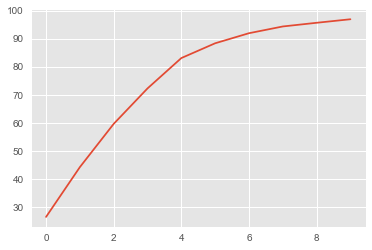

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(a)
principalDf_ii = pd.DataFrame(data = principalComponents)
print("Cumulative variance ratio:") 
print(" ")
var2=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var2)
plt.plot(var2)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(a)
principalDf_ii = pd.DataFrame(data = principalComponents
             , 
    columns = ['ii principal component 1', 'ii principal component 2', 'ii principal component 3', 'ii principal component 4',
              'ii principal component 5', 'ii principal component 6', 'ii principal component 7']
                          )
finalDf = pd.concat([principalDf_ii, dataset[['Response']]], axis = 1)

In [36]:
principalDf_ii.head()

,ii principal component 1,ii principal component 2,ii principal component 3,ii principal component 4,ii principal component 5,ii principal component 6,ii principal component 7
0,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855
1,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855
2,-0.536022,0.209808,-0.785129,-0.135059,-0.241743,-0.144342,0.008176
3,1.083395,1.112902,-0.150627,-0.402950,0.022249,-0.029009,-0.041506
4,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855


In [37]:
b = dataset.loc[:, 'Medical_Keyword_1':'Medical_Keyword_48']

In [38]:
b.head()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Cumulative variance ratio:
 
[ 14.57  22.15  28.37  33.77  38.52  42.98  47.25  50.95  54.55  57.89
  60.84  63.63  65.69  67.53  69.29  70.98  72.56  74.1   75.36  76.58
  77.79  78.96  80.11  81.24  82.35  83.41  84.46  85.45  86.41  87.32
  88.2   89.07  89.92  90.74  91.56]


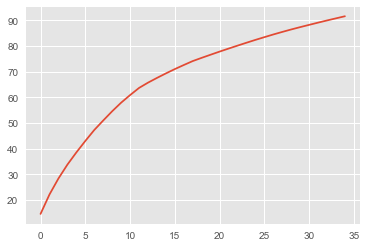

In [39]:
pca = PCA(n_components=35)
principalComponents = pca.fit_transform(b)
principalDf_mk = pd.DataFrame(data = principalComponents)

print("Cumulative variance ratio:") 
print(" ")
var3=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var3)
plt.plot(var3)

In [40]:
pca = PCA(n_components=34)
principalComponents = pca.fit_transform(b)
principalDf_mk = pd.DataFrame(data = principalComponents
             , 
    columns = ['mk principal component 1', 'mk principal component 2', 'mk principal component 3', 'mk principal component 4',
              'mk principal component 5', 'mk principal component 6', 'mk principal component 7', 'mk principal component 8', 'mk principal component 9'
              , 'mk principal component 10', 'mk principal component 11', 'mk principal component 12', 'mk principal component 13'
              , 'mk principal component 14', 'mk principal component 15', 'mk principal component 16', 'mk principal component 17'
              , 'mk principal component 18', 'mk principal component 19', 'mk principal component 20', 'mk principal component 21'
              , 'mk principal component 22', 'mk principal component 23', 'mk principal component 24'
              , 'mk principal component 25', 'mk principal component 26', 'mk principal component 27', 'mk principal component 28'
              , 'mk principal component 29', 'mk principal component 30', 'mk principal component 31', 'mk principal component 32'
              , 'mk principal component 33', 'mk principal component 34']
                          )
finalDf = pd.concat([finalDf, principalDf_mk], axis = 1)

In [41]:
finalDf.head()

,ii principal component 1,ii principal component 2,ii principal component 3,ii principal component 4,ii principal component 5,ii principal component 6,ii principal component 7,Response,mk principal component 1,mk principal component 2,...,mk principal component 25,mk principal component 26,mk principal component 27,mk principal component 28,mk principal component 29,mk principal component 30,mk principal component 31,mk principal component 32,mk principal component 33,mk principal component 34
0,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.002483,-0.008585,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966
1,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,4,-0.239605,-0.119923,...,-0.002483,-0.008585,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966
2,-0.536022,0.209808,-0.785129,-0.135059,-0.241743,-0.144342,0.008176,8,-0.239605,-0.119923,...,-0.002483,-0.008585,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966
3,1.083395,1.112902,-0.150627,-0.402950,0.022249,-0.029009,-0.041506,8,-0.235462,-0.095941,...,-0.011961,-0.027608,-0.020965,-0.023053,-0.004446,-0.013142,-0.010425,-0.011199,0.010206,-0.013147
4,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.002483,-0.008585,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966


In [42]:
principalDf_mk.head()

,mk principal component 1,mk principal component 2,mk principal component 3,mk principal component 4,mk principal component 5,mk principal component 6,mk principal component 7,mk principal component 8,mk principal component 9,mk principal component 10,...,mk principal component 25,mk principal component 26,mk principal component 27,mk principal component 28,mk principal component 29,mk principal component 30,mk principal component 31,mk principal component 32,mk principal component 33,mk principal component 34
0,-0.239605,-0.119923,-0.037149,-0.066177,-0.050398,0.000012,-0.005106,-0.007405,-0.026633,-0.005938,...,-0.002483,-0.008585,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966
1,-0.239605,-0.119923,-0.037149,-0.066177,-0.050398,0.000012,-0.005106,-0.007405,-0.026633,-0.005938,...,-0.002483,-0.008585,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966
2,-0.239605,-0.119923,-0.037149,-0.066177,-0.050398,0.000012,-0.005106,-0.007405,-0.026633,-0.005938,...,-0.002483,-0.008585,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966
3,-0.235462,-0.095941,-0.032917,-0.029468,-0.035959,0.005212,-0.001679,-0.014171,0.000854,0.009704,...,-0.011961,-0.027608,-0.020965,-0.023053,-0.004446,-0.013142,-0.010425,-0.011199,0.010206,-0.013147
4,-0.239605,-0.119923,-0.037149,-0.066177,-0.050398,0.000012,-0.005106,-0.007405,-0.026633,-0.005938,...,-0.002483,-0.008585,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966


In [43]:
d = pd.DataFrame(dataset.loc[:, 'mh2_1':'mh41_3'])

In [44]:
d = pd.concat([d, dataset['Medical_History_1']], axis=1)
d = pd.concat([d, dataset['Medical_History_10']], axis=1)
d = pd.concat([d, dataset['Medical_History_15']], axis=1)
d = pd.concat([d, dataset['Medical_History_24']], axis=1)
d = pd.concat([d, dataset['Medical_History_32']], axis=1)

In [45]:
d.head()

,mh2_1,mh2_2,mh2_3,mh2_5,mh2_6,mh2_7,mh2_8,mh2_9,mh2_10,mh2_12,...,mh40_2,mh40_3,mh41_1,mh41_2,mh41_3,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,4.000000,141.118492,240.000000,50.635622,11.965673
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,5.000000,141.118492,0.000000,50.635622,11.965673
2,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,10.000000,141.118492,123.760974,50.635622,11.965673
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.000000,141.118492,123.760974,50.635622,11.965673
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,7.962172,141.118492,123.760974,50.635622,11.965673


Cumulative variance ratio:
 
[ 78.34  90.92  95.58  98.9   99.8   99.83  99.85  99.86  99.87  99.88]


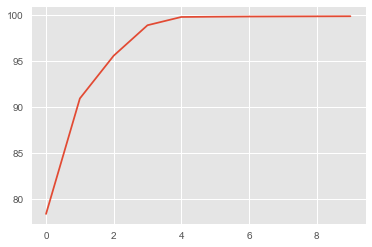

In [46]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(d)
principalDf_mh = pd.DataFrame(data = principalComponents)
print("Cumulative variance ratio:") 
print(" ")
var4=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var4)
plt.plot(var4)

In [47]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d)
principalDf_mh = pd.DataFrame(data = principalComponents
         , 
    columns = ['mh principal component 1', 'mh principal component 2']
                          )
finalDf = pd.concat([finalDf, principalDf_mh], axis = 1)

In [48]:
finalDf.head()

,ii principal component 1,ii principal component 2,ii principal component 3,ii principal component 4,ii principal component 5,ii principal component 6,ii principal component 7,Response,mk principal component 1,mk principal component 2,...,mk principal component 27,mk principal component 28,mk principal component 29,mk principal component 30,mk principal component 31,mk principal component 32,mk principal component 33,mk principal component 34,mh principal component 1,mh principal component 2
0,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966,116.039213,-7.090034
1,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,4,-0.239605,-0.119923,...,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966,-123.504258,7.584399
2,-0.536022,0.209808,-0.785129,-0.135059,-0.241743,-0.144342,0.008176,8,-0.239605,-0.119923,...,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966,-0.014035,-0.010824
3,1.083395,1.112902,-0.150627,-0.402950,0.022249,-0.029009,-0.041506,8,-0.235462,-0.095941,...,-0.020965,-0.023053,-0.004446,-0.013142,-0.010425,-0.011199,0.010206,-0.013147,0.046787,0.036869
4,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.006275,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966,-0.002403,-0.001516


In [49]:
principalDf_mh.head()

,mh principal component 1,mh principal component 2
0,116.039213,-7.090034
1,-123.504258,7.584399
2,-0.014035,-0.010824
3,0.046787,0.036869
4,-0.002403,-0.001516


In [50]:
e = pd.DataFrame(dataset.loc[:, 'fh_1':'fh_3'])

In [51]:
e.head()

,fh_1,fh_2,fh_3
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [52]:
e = pd.concat([e, dataset['Family_Hist_2']], axis=1)
e = pd.concat([e, dataset['Family_Hist_3']], axis=1)
e = pd.concat([e, dataset['Family_Hist_4']], axis=1)
e = pd.concat([e, dataset['Family_Hist_5']], axis=1)

In [53]:
e.head()

,fh_1,fh_2,fh_3,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
0,0,1,0,0.474550,0.598039,0.444890,0.526786
1,0,1,0,0.188406,0.497737,0.084507,0.484635
2,0,0,1,0.304348,0.497737,0.225352,0.484635
3,0,0,1,0.420290,0.497737,0.352113,0.484635
4,0,1,0,0.463768,0.497737,0.408451,0.484635


Cumulative variance ratio:
 
[ 88.07  93.27  96.11]


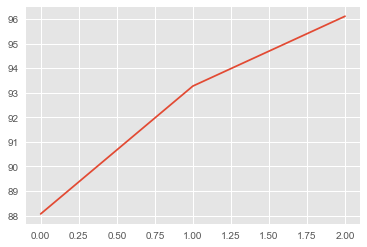

In [55]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(e)
principalDf_fh = pd.DataFrame(data = principalComponents
             , 
    columns = ['fh principal component 1', 'fh principal component 2', 'fh principal component 3']
                          )
print("Cumulative variance ratio:") 
print(" ")
var5=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var5)
plt.plot(var5)

In [56]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(e)
principalDf_fh = pd.DataFrame(data = principalComponents
             , 
    columns = ['fh principal component 1']
                          )
finalDf = pd.concat([finalDf, principalDf_fh], axis = 1)

In [57]:
finalDf.head()

,ii principal component 1,ii principal component 2,ii principal component 3,ii principal component 4,ii principal component 5,ii principal component 6,ii principal component 7,Response,mk principal component 1,mk principal component 2,...,mk principal component 28,mk principal component 29,mk principal component 30,mk principal component 31,mk principal component 32,mk principal component 33,mk principal component 34,mh principal component 1,mh principal component 2,fh principal component 1
0,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966,116.039213,-7.090034,0.984874
1,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,4,-0.239605,-0.119923,...,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966,-123.504258,7.584399,0.978931
2,-0.536022,0.209808,-0.785129,-0.135059,-0.241743,-0.144342,0.008176,8,-0.239605,-0.119923,...,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966,-0.014035,-0.010824,-0.430139
3,1.083395,1.112902,-0.150627,-0.402950,0.022249,-0.029009,-0.041506,8,-0.235462,-0.095941,...,-0.023053,-0.004446,-0.013142,-0.010425,-0.011199,0.010206,-0.013147,0.046787,0.036869,-0.426516
4,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.003211,-0.007877,-0.004966,-0.003564,-0.007080,-0.001888,-0.003966,-0.002403,-0.001516,0.987943


In [58]:
principalDf_fh.head()

,fh principal component 1
0,0.984874
1,0.978931
2,-0.430139
3,-0.426516
4,0.987943


In [59]:
ei = pd.DataFrame(dataset.loc[:, 'ei2_1':'ei5_3'])

In [60]:
ei.head()

,ei2_1,ei2_2,ei2_3,ei2_4,ei2_5,ei2_6,ei2_7,ei2_9,ei2_10,ei2_11,...,ei2_33,ei2_34,ei2_35,ei2_36,ei2_37,ei2_38,ei3_1,ei3_3,ei5_2,ei5_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [61]:
ei = pd.concat([ei, dataset['Employment_Info_1']], axis=1)
ei = pd.concat([ei, dataset['Employment_Info_4']], axis=1)
ei = pd.concat([ei, dataset['Employment_Info_6']], axis=1)

In [62]:
ei.head()

,ei2_1,ei2_2,ei2_3,ei2_4,ei2_5,ei2_6,ei2_7,ei2_9,ei2_10,ei2_11,...,ei2_36,ei2_37,ei2_38,ei3_1,ei3_3,ei5_2,ei5_3,Employment_Info_1,Employment_Info_4,Employment_Info_6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.028,0.0,0.361469
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0.000,0.0,0.001800
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0.030,0.0,0.030000
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0.042,0.0,0.200000
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0.027,0.0,0.050000


Cumulative variance ratio:
 
[ 42.1   62.46  77.99  86.44  93.9   96.85  97.81  98.45  98.88  99.21]


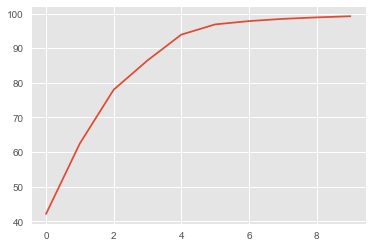

In [63]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(ei)
principalDf_ei = pd.DataFrame(data = principalComponents )
print("Cumulative variance ratio:") 
print(" ")
var6=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var6)
plt.plot(var6)

In [64]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(ei)
principalDf_ei = pd.DataFrame(data = principalComponents
            , 
    columns = ['ei principal component 1', 'ei principal component 2', 'ei principal component 3', 'ei principal component 4',
              'ei principal component 5']
                          )
finalDf = pd.concat([finalDf, principalDf_ei], axis = 1)

In [65]:
finalDf.head()

,ii principal component 1,ii principal component 2,ii principal component 3,ii principal component 4,ii principal component 5,ii principal component 6,ii principal component 7,Response,mk principal component 1,mk principal component 2,...,mk principal component 33,mk principal component 34,mh principal component 1,mh principal component 2,fh principal component 1,ei principal component 1,ei principal component 2,ei principal component 3,ei principal component 4,ei principal component 5
0,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.001888,-0.003966,116.039213,-7.090034,0.984874,0.495660,-0.030340,1.493524,-0.196090,-0.351595
1,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,4,-0.239605,-0.119923,...,-0.001888,-0.003966,-123.504258,7.584399,0.978931,1.386782,-0.116961,-0.775037,0.225326,-0.340814
2,-0.536022,0.209808,-0.785129,-0.135059,-0.241743,-0.144342,0.008176,8,-0.239605,-0.119923,...,-0.001888,-0.003966,-0.014035,-0.010824,-0.430139,-0.498094,0.221564,-0.212414,0.162390,-0.224733
3,1.083395,1.112902,-0.150627,-0.402950,0.022249,-0.029009,-0.041506,8,-0.235462,-0.095941,...,0.010206,-0.013147,0.046787,0.036869,-0.426516,-0.026830,1.033349,0.831554,0.052918,-0.011797
4,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.001888,-0.003966,-0.002403,-0.001516,0.987943,-0.497232,0.218624,-0.211375,0.148950,-0.211005


In [66]:
principalDf_ei.head()

,ei principal component 1,ei principal component 2,ei principal component 3,ei principal component 4,ei principal component 5
0,0.495660,-0.030340,1.493524,-0.196090,-0.351595
1,1.386782,-0.116961,-0.775037,0.225326,-0.340814
2,-0.498094,0.221564,-0.212414,0.162390,-0.224733
3,-0.026830,1.033349,0.831554,0.052918,-0.011797
4,-0.497232,0.218624,-0.211375,0.148950,-0.211005


In [67]:
ihis = pd.DataFrame(dataset.loc[:, 'ih1_1':'ih9_3'])

In [68]:
ihis.head()

,ih1_1,ih1_2,ih2_1,ih2_2,ih2_3,ih3_1,ih3_2,ih3_3,ih4_1,ih4_2,ih4_3,ih7_1,ih7_2,ih7_3,ih8_1,ih8_2,ih8_3,ih9_1,ih9_2,ih9_3
0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0
2,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1
4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [69]:
ihis = pd.concat([ihis, dataset['Insurance_History_5']], axis=1)

In [70]:
ihis.head()

,ih1_1,ih1_2,ih2_1,ih2_2,ih2_3,ih3_1,ih3_2,ih3_3,ih4_1,ih4_2,...,ih7_1,ih7_2,ih7_3,ih8_1,ih8_2,ih8_3,ih9_1,ih9_2,ih9_3,Insurance_History_5
0,1,0,1,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0.000667
1,0,1,1,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0.000133
2,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0.001733
3,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0.001733
4,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0.001733


Cumulative variance ratio:
 
[ 72.73  90.47  95.25  97.49  99.17  99.64]


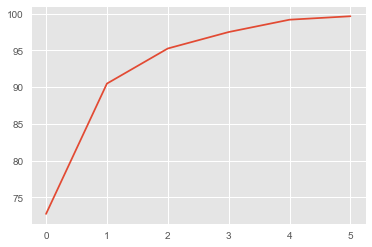

In [71]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(ihis)
principalDf_ihis = pd.DataFrame(data = principalComponents)
print("Cumulative variance ratio:") 
print(" ")
var7=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var7)
plt.plot(var7)

In [72]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ihis)
principalDf_ihis = pd.DataFrame(data = principalComponents
            , 
    columns = ['ihis principal component 1', 'ihis principal component 2']
                          )
finalDf = pd.concat([finalDf, principalDf_ihis], axis = 1)

In [73]:
finalDf.head()

,ii principal component 1,ii principal component 2,ii principal component 3,ii principal component 4,ii principal component 5,ii principal component 6,ii principal component 7,Response,mk principal component 1,mk principal component 2,...,mh principal component 1,mh principal component 2,fh principal component 1,ei principal component 1,ei principal component 2,ei principal component 3,ei principal component 4,ei principal component 5,ihis principal component 1,ihis principal component 2
0,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,116.039213,-7.090034,0.984874,0.495660,-0.030340,1.493524,-0.196090,-0.351595,-1.574424,0.976838
1,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,4,-0.239605,-0.119923,...,-123.504258,7.584399,0.978931,1.386782,-0.116961,-0.775037,0.225326,-0.340814,-1.207590,-0.932149
2,-0.536022,0.209808,-0.785129,-0.135059,-0.241743,-0.144342,0.008176,8,-0.239605,-0.119923,...,-0.014035,-0.010824,-0.430139,-0.498094,0.221564,-0.212414,0.162390,-0.224733,1.761803,0.079189
3,1.083395,1.112902,-0.150627,-0.402950,0.022249,-0.029009,-0.041506,8,-0.235462,-0.095941,...,0.046787,0.036869,-0.426516,-0.026830,1.033349,0.831554,0.052918,-0.011797,1.761803,0.079189
4,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.002403,-0.001516,0.987943,-0.497232,0.218624,-0.211375,0.148950,-0.211005,1.761803,0.079189


In [74]:
principalDf_ihis.head()

,ihis principal component 1,ihis principal component 2
0,-1.574424,0.976838
1,-1.207590,-0.932149
2,1.761803,0.079189
3,1.761803,0.079189
4,1.761803,0.079189


In [75]:
pi = pd.DataFrame(dataset.loc[:, 'pi1_1':'pi7_3'])

In [76]:
pi.head()

,pi1_1,pi1_2,pi3_1,pi3_2,pi3_3,pi3_4,pi3_5,pi3_6,pi3_8,pi3_9,...,pi3_36,pi3_37,pi3_38,pi5_2,pi5_3,pi6_1,pi6_3,pi7_1,pi7_2,pi7_3
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [77]:
pi = pd.concat([pi, dataset['Product_Info_4']], axis=1)
pi = pd.concat([pi, dataset['Product_Info_2_number']], axis=1)
pi = pd.concat([pi, dataset['A']], axis=1)
pi = pd.concat([pi, dataset['B']], axis=1)
pi = pd.concat([pi, dataset['C']], axis=1)
pi = pd.concat([pi, dataset['D']], axis=1)
pi = pd.concat([pi, dataset['E']], axis=1)

In [78]:
pi.head()

,pi1_1,pi1_2,pi3_1,pi3_2,pi3_3,pi3_4,pi3_5,pi3_6,pi3_8,pi3_9,...,pi7_1,pi7_2,pi7_3,Product_Info_4,Product_Info_2_number,A,B,C,D,E
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0.076923,3,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0.076923,1,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0.076923,1,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0.487179,4,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0.230769,2,0,0,0,1,0


Cumulative variance ratio:
 
[ 80.99  86.11  90.83  94.19  95.42  96.41  97.28  98.01  98.6   99.05]


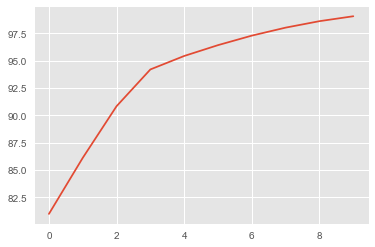

In [79]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(pi)
principalDf_pi = pd.DataFrame(data = principalComponents)
print("Cumulative variance ratio:") 
print(" ")
var8=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var8)
plt.plot(var8)

In [80]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(pi)
principalDf_pi = pd.DataFrame(data = principalComponents
             , 
    columns = ['pi principal component 1', 'pi principal component 2', 'pi principal component 3']
                          )
finalDf = pd.concat([finalDf, principalDf_pi], axis = 1)

In [81]:
finalDf.head()

,ii principal component 1,ii principal component 2,ii principal component 3,ii principal component 4,ii principal component 5,ii principal component 6,ii principal component 7,Response,mk principal component 1,mk principal component 2,...,ei principal component 1,ei principal component 2,ei principal component 3,ei principal component 4,ei principal component 5,ihis principal component 1,ihis principal component 2,pi principal component 1,pi principal component 2,pi principal component 3
0,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,0.495660,-0.030340,1.493524,-0.196090,-0.351595,-1.574424,0.976838,-0.483855,-0.340349,1.044980
1,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,4,-0.239605,-0.119923,...,1.386782,-0.116961,-0.775037,0.225326,-0.340814,-1.207590,-0.932149,-2.235865,1.316418,-0.146354
2,-0.536022,0.209808,-0.785129,-0.135059,-0.241743,-0.144342,0.008176,8,-0.239605,-0.119923,...,-0.498094,0.221564,-0.212414,0.162390,-0.224733,1.761803,0.079189,-2.387629,0.865351,-0.187557
3,1.083395,1.112902,-0.150627,-0.402950,0.022249,-0.029009,-0.041506,8,-0.235462,-0.095941,...,-0.026830,1.033349,0.831554,0.052918,-0.011797,1.761803,0.079189,0.502168,-0.482241,-0.342796
4,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.497232,0.218624,-0.211375,0.148950,-0.211005,1.761803,0.079189,-1.478048,-0.205143,-0.249078


In [82]:
principalDf_pi.head()

,pi principal component 1,pi principal component 2,pi principal component 3
0,-0.483855,-0.340349,1.044980
1,-2.235865,1.316418,-0.146354
2,-2.387629,0.865351,-0.187557
3,0.502168,-0.482241,-0.342796
4,-1.478048,-0.205143,-0.249078


In [83]:
finalDf.head()

,ii principal component 1,ii principal component 2,ii principal component 3,ii principal component 4,ii principal component 5,ii principal component 6,ii principal component 7,Response,mk principal component 1,mk principal component 2,...,ei principal component 1,ei principal component 2,ei principal component 3,ei principal component 4,ei principal component 5,ihis principal component 1,ihis principal component 2,pi principal component 1,pi principal component 2,pi principal component 3
0,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,0.495660,-0.030340,1.493524,-0.196090,-0.351595,-1.574424,0.976838,-0.483855,-0.340349,1.044980
1,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,4,-0.239605,-0.119923,...,1.386782,-0.116961,-0.775037,0.225326,-0.340814,-1.207590,-0.932149,-2.235865,1.316418,-0.146354
2,-0.536022,0.209808,-0.785129,-0.135059,-0.241743,-0.144342,0.008176,8,-0.239605,-0.119923,...,-0.498094,0.221564,-0.212414,0.162390,-0.224733,1.761803,0.079189,-2.387629,0.865351,-0.187557
3,1.083395,1.112902,-0.150627,-0.402950,0.022249,-0.029009,-0.041506,8,-0.235462,-0.095941,...,-0.026830,1.033349,0.831554,0.052918,-0.011797,1.761803,0.079189,0.502168,-0.482241,-0.342796
4,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,8,-0.239605,-0.119923,...,-0.497232,0.218624,-0.211375,0.148950,-0.211005,1.761803,0.079189,-1.478048,-0.205143,-0.249078


# Modeling and evaluation 


In [84]:
newX = finalDf.drop(['Response'], axis=1)

In [85]:
newX.head()

,ii principal component 1,ii principal component 2,ii principal component 3,ii principal component 4,ii principal component 5,ii principal component 6,ii principal component 7,mk principal component 1,mk principal component 2,mk principal component 3,...,ei principal component 1,ei principal component 2,ei principal component 3,ei principal component 4,ei principal component 5,ihis principal component 1,ihis principal component 2,pi principal component 1,pi principal component 2,pi principal component 3
0,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,-0.239605,-0.119923,-0.037149,...,0.495660,-0.030340,1.493524,-0.196090,-0.351595,-1.574424,0.976838,-0.483855,-0.340349,1.044980
1,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,-0.239605,-0.119923,-0.037149,...,1.386782,-0.116961,-0.775037,0.225326,-0.340814,-1.207590,-0.932149,-2.235865,1.316418,-0.146354
2,-0.536022,0.209808,-0.785129,-0.135059,-0.241743,-0.144342,0.008176,-0.239605,-0.119923,-0.037149,...,-0.498094,0.221564,-0.212414,0.162390,-0.224733,1.761803,0.079189,-2.387629,0.865351,-0.187557
3,1.083395,1.112902,-0.150627,-0.402950,0.022249,-0.029009,-0.041506,-0.235462,-0.095941,-0.032917,...,-0.026830,1.033349,0.831554,0.052918,-0.011797,1.761803,0.079189,0.502168,-0.482241,-0.342796
4,0.806306,-0.360167,0.114698,0.880885,-0.072230,-0.183872,-0.016855,-0.239605,-0.119923,-0.037149,...,-0.497232,0.218624,-0.211375,0.148950,-0.211005,1.761803,0.079189,-1.478048,-0.205143,-0.249078


In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
RF=RandomForestClassifier(n_estimators=50, max_depth=7)

In [92]:
rf_model=RF.fit(newX, y)

In [93]:
predictions_rf= rf_model.predict(newX)

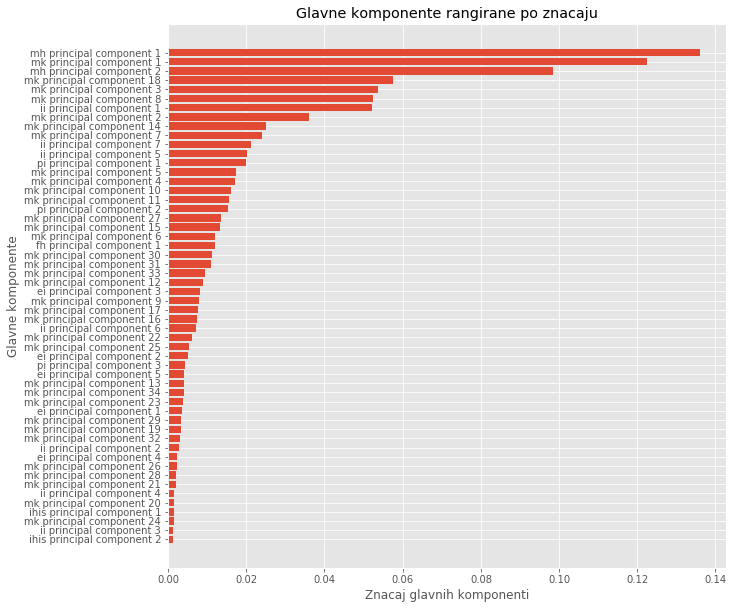

In [104]:
imp = rf_model.feature_importances_
names = newX.columns
imp,names = zip(*sorted(zip(imp, names)))
plt.barh(range(len(names)),imp, align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Principal components inportance')
plt.ylabel('Principal components')
plt.title('Principal components ranked by importance')
rcParams['figure.figsize'] = 5,5
plt.figure(figsize = (100,100))
plt.show()

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [106]:
f1_score(y, predictions_rf, average='micro')

0.45258584395682122

In [107]:
f1_score(y, predictions_rf, average='macro')

0.3400558752832481

In [108]:
f1_score(y, predictions_rf, average='weighted')

0.38302357763610628

In [93]:
from sklearn.model_selection import cross_val_score

In [110]:
scores3 = cross_val_score(RF, newX, y, cv=5, scoring='f1_micro')

In [111]:
np.average(scores3)

0.43124898482493929

In [101]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [113]:
params = [
  {'n_estimators': [20, 40, 100, 300, 500], 'max_depth': [5, 10, 15]} 
 ]

In [114]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(newX):
    fold += 1
    X_train, X_test = newX.iloc[train_idx], newX.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(RF, 
                   param_grid=params, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_rf=optimizer.fit(X_train,y_train)
    predictions_opt=opt_rf.predict(X_test)
    score20 = f1_score(y_test, predictions_opt, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score20)) 


Score for fold 1: 0.454
Score for fold 2: 0.457
Score for fold 3: 0.451
Score for fold 4: 0.445
Score for fold 5: 0.445


In [116]:
opt_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [173]:
from sklearn.ensemble import GradientBoostingClassifier

In [174]:
GBR= GradientBoostingClassifier(n_estimators=50, max_depth=3)

In [175]:
GBR_model=GBR.fit(newX,y)

In [176]:
print(GBR_model.feature_importances_)

[ 0.03499692  0.0048392   0.00422962  0.01158758  0.00061865  0.00676181
  0.01074938  0.06722955  0.02066965  0.00945645  0.01262861  0.00597717
  0.00226496  0.02470461  0.04795401  0.00546109  0.00943694  0.0038734
  0.00719182  0.00363818  0.00890452  0.00416644  0.00541702  0.00578113
  0.00621451  0.00234501  0.00148519  0.00334926  0.00167282  0.00091399
  0.00410462  0.00211239  0.00430462  0.00561739  0.00348651  0.0064445
  0.0025992   0.00583808  0.01078822  0.00825701  0.00924865  0.22290203
  0.03943935  0.03317032  0.01716481  0.01572264  0.01532494  0.01432703
  0.01617323  0.01525469  0.0112614   0.07984971  0.09505771  0.02703144]


In [178]:
predictions_gbr= GBR_model.predict(newX)

In [181]:
f1_score(y, predictions_gbr, average='micro')

0.4776612047624661

In [182]:
f1_score(y, predictions_gbr, average='macro')

0.39696421851808245

In [183]:
f1_score(y, predictions_gbr, average='weighted')

0.42581106158454257

In [187]:
scores4 = cross_val_score(GBR, newX, y, cv=5, scoring='f1_micro')

In [188]:
np.average(scores4)

0.46108960852422171

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
LR= LogisticRegression()

In [96]:
LR_model=LR.fit(newX,y)

In [97]:
predictions_lr= LR_model.predict(newX)

In [106]:
f1_score(y, predictions_lr, average='micro')

0.43140061635876797

In [107]:
f1_score(y, predictions_lr, average='macro')

0.30410174005521479

In [108]:
f1_score(y, predictions_lr, average='weighted')

0.36140233971534402

In [98]:
scores5 = cross_val_score(LR, newX, y, cv=5, scoring='f1_micro')

In [110]:
np.average(scores5)

0.42825140891857155

In [103]:
paramsLR = [ 
  {'n_jobs': [1,2], 'fit_intercept' : [True, False], 'solver' : ['newton-cg', 'lbfgs', 'sag'], 'max_iter' : [70,100,150]}
 ] 


In [104]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(newX):
    fold += 1
    X_train, X_test = newX.iloc[train_idx], newX.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(LR, 
                   param_grid=paramsLR, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_lr=optimizer.fit(X_train,y_train)
    predictions_opt_lr=opt_lr.predict(X_test)
    score27 = f1_score(y_test, predictions_opt_lr, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score27)) 

Score for fold 1: 0.430
Score for fold 2: 0.434
Score for fold 3: 0.427
Score for fold 4: 0.427
Score for fold 5: 0.425


In [106]:
opt_lr.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
from sklearn.linear_model import RidgeClassifier

In [113]:
R= RidgeClassifier()

In [114]:
R_model=R.fit(newX,y)

In [115]:
predictions_r= R_model.predict(newX)

In [116]:
f1_score(y, predictions_r, average='micro')

0.40425388592310674

In [117]:
f1_score(y, predictions_r, average='macro')

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.18466530500004841

In [118]:
f1_score(y, predictions_r, average='weighted')

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.31567465122548471

In [122]:
scores6 = cross_val_score(R, newX, y, cv=5, scoring='f1_micro')

In [123]:
np.average(scores6)

0.40297397944317093

In [124]:
scores7 = cross_val_score(R, newX, y, cv=10, scoring='f1_micro')

In [125]:
np.average(scores7)

0.40304136997891948

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

In [127]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(newX):
    fold += 1
    X_train, X_test = newX.iloc[train_idx], newX.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
clf = Pipeline([ 
  ('feature_selection', SelectKBest(mutual_info_classif,k=20)),
  ('classification', RidgeClassifier())
 ])

opt_r1=clf.fit(X_train,y_train)
predictions_opt_r1=opt_r1.predict(X_test)
score25 = f1_score(y_test, predictions_opt_r1, average = 'micro')
print("Score: %.3f" % (score25)) 

Score: 0.395


In [128]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(newX):
    fold += 1
    X_train, X_test = newX.iloc[train_idx], newX.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
clf = Pipeline([ 
  ('variance selection' ,VarianceThreshold(threshold=(.1 * (1 - .1)))),
 # ('feature_selection', SelectKBest(chi2,k=20)),
  ('classification', RidgeClassifier())
 ])

opt_r1=clf.fit(X_train,y_train)
predictions_opt_r1=opt_r1.predict(X_test)
score26 = f1_score(y_test, predictions_opt_r1, average = 'micro')
print("Score: %.3f" % (score26))

Score: 0.377


In [129]:
selector = VarianceThreshold(threshold=(.1 * (1 - .1)))
selector.fit_transform(newX)
data_transformed = newX.loc[:, selector.get_support()]
print(data_transformed.dtypes)

ii principal component 1      float64
ii principal component 2      float64
ii principal component 3      float64
ii principal component 4      float64
ii principal component 5      float64
ii principal component 6      float64
mk principal component 1      float64
mh principal component 1      float64
mh principal component 2      float64
fh principal component 1      float64
ei principal component 1      float64
ei principal component 2      float64
ei principal component 3      float64
ei principal component 4      float64
ei principal component 5      float64
ihis principal component 1    float64
ihis principal component 2    float64
pi principal component 1      float64
pi principal component 2      float64
pi principal component 3      float64
dtype: object


In [130]:
paramsR = [ 
  {'alpha' : [1.0, 1.5, 2.0],'normalize': [True, False], 'fit_intercept' : [True, False], 'solver' : ['auto', 'svd','sparse_cg']}
 ]

In [131]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(newX):
    fold += 1
    X_train, X_test = newX.iloc[train_idx], newX.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(R, 
                   param_grid=paramsR, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_r=optimizer.fit(X_train,y_train)
    predictions_opt_r=opt_r.predict(X_test)
    score23 = f1_score(y_test, predictions_opt_r, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score23)) 


Score for fold 1: 0.405
Score for fold 2: 0.409
Score for fold 3: 0.401
Score for fold 4: 0.398
Score for fold 5: 0.402


In [133]:
opt_r.best_estimator_

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [274]:
from sklearn.ensemble import ExtraTreesClassifier

In [275]:
ETC=ExtraTreesClassifier(n_estimators=50, max_depth=10)

In [276]:
etc_model=ETC.fit(newX, y)

In [277]:
print(etc_model.feature_importances_)

[ 0.09191516  0.01095458  0.00451947  0.00427883  0.00997046  0.00447122
  0.00322961  0.21050281  0.04485713  0.03785199  0.01495312  0.00664874
  0.00821328  0.03228613  0.07592453  0.02724624  0.00984898  0.00605468
  0.00501712  0.00413496  0.00831154  0.00525977  0.0026844   0.00695129
  0.00859153  0.00528439  0.00264404  0.0028379   0.00282579  0.00243949
  0.00272353  0.00237122  0.00404373  0.00266367  0.0057693   0.00723261
  0.00311674  0.00288027  0.00291844  0.00297665  0.00305872  0.13823512
  0.01735032  0.0217046   0.01417515  0.01480006  0.01375089  0.00472874
  0.0049042   0.00837836  0.00459842  0.0305053   0.02216538  0.00423939]


In [279]:
predictions_etc= etc_model.predict(newX)

In [280]:
f1_score(y, predictions_etc, average='micro')

0.47675182297367846

In [281]:
f1_score(y, predictions_etc, average='macro')

0.33235429392892618

In [282]:
f1_score(y, predictions_etc, average='weighted')

0.41450965612770863

In [284]:
scores10 = cross_val_score(ETC, newX, y, cv=5, scoring='f1_micro')

In [285]:
np.average(scores10)

0.41068608305244692

In [286]:
scores11 = cross_val_score(ETC, newX, y, cv=10, scoring='f1_micro')

In [287]:
np.average(scores11)

0.41213423106389396

In [288]:
params = [
  {'n_estimators': [20, 40, 100, 300, 500], 'max_depth': [5, 10, 15]} 
 ]

In [289]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(newX):
    fold += 1
    X_train_etc, X_test_etc = newX.iloc[train_idx], newX.iloc[test_idx]
    y_train_etc, y_test_etc = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(ETC, 
                   param_grid=params, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_rf=optimizer.fit(X_train_etc,y_train_etc)
    predictions_opt=opt_rf.predict(X_test_etc)
    score22 = f1_score(y_test_etc, predictions_opt, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score22)) 


Score for fold 1: 0.439
Score for fold 2: 0.442
Score for fold 3: 0.432
Score for fold 4: 0.429
Score for fold 5: 0.430


In [87]:
import xgboost as xgb

In [88]:
from xgboost import XGBClassifier

In [89]:
XGB = XGBClassifier(n_estimators=50)

In [90]:
XGB_model = XGB.fit(newX, y)

In [91]:
from xgboost import plot_importance
from pylab import rcParams

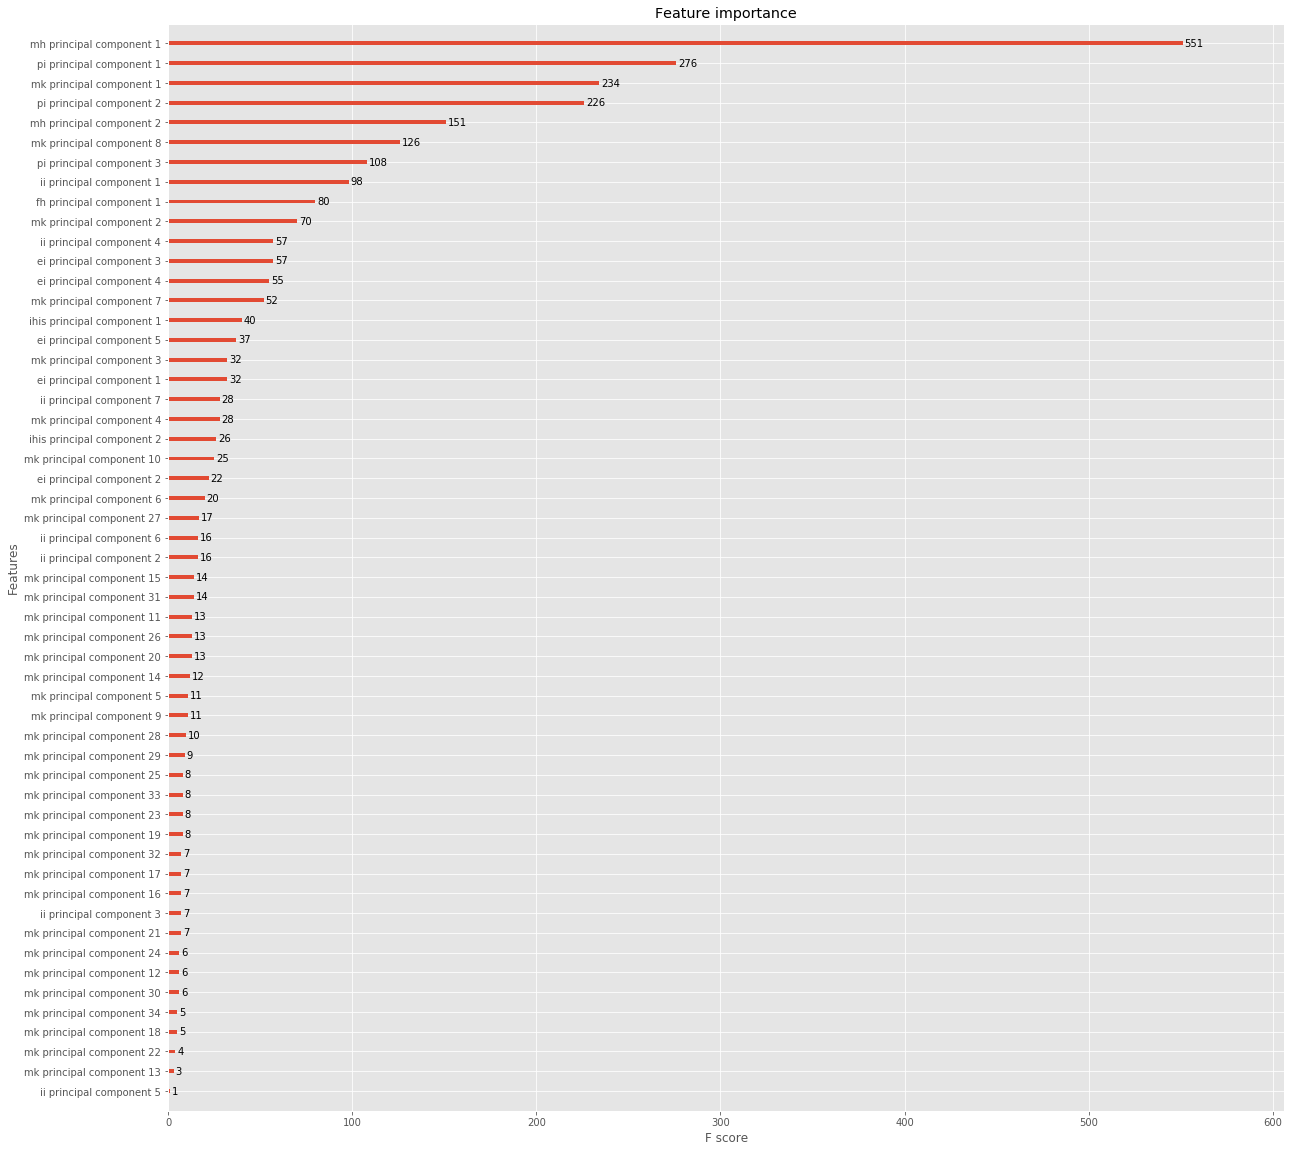

In [304]:
plot_importance(XGB_model)
rcParams['figure.figsize'] = 5,5
plt.show()

In [92]:
predictions_xgb= XGB_model.predict(newX)

In [93]:
f1_score(y, predictions_xgb, average='micro')

0.4605176740034691

In [94]:
f1_score(y, predictions_xgb, average='macro')

0.36132038860390236

In [95]:
f1_score(y, predictions_xgb, average='weighted')

0.39651280248519311

In [96]:
scores12 = cross_val_score(XGB, newX, y, cv=5, scoring='f1_micro')

In [97]:
np.average(scores12)

0.45351154823723833

In [98]:
paramsXGB = [
  {'n_estimators': [120, 130, 140], 'max_depth': [3,6,10]} 
 ]

In [99]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(newX):
    fold += 1
    X_train, X_test = newX.iloc[train_idx], newX.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(XGB, 
                   param_grid=paramsXGB, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_xgb=optimizer.fit(X_train,y_train)
    predictions_opt_xgb=opt_xgb.predict(X_test)
    score28 = f1_score(y_test, predictions_opt_xgb, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score28)) 

Score for fold 1: 0.473
Score for fold 2: 0.476
Score for fold 3: 0.464
Score for fold 4: 0.463
Score for fold 5: 0.463


In [101]:
opt_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
LREG = LogisticRegression(penalty='l1')

In [121]:
LREG_model = LREG.fit(newX, y)

In [122]:
predictions_lreg= LREG_model.predict(newX)

In [123]:
f1_score(y, predictions_lreg, average='micro')

0.43151849918324042

In [124]:
f1_score(y, predictions_lreg, average='macro')

0.30416401363203704

In [125]:
f1_score(y, predictions_lreg, average='weighted')

0.36139555409279955

In [139]:
scores13 = cross_val_score(LREG, newX, y, cv=5, scoring='f1_micro')

In [140]:
np.average(scores13)

0.42850391572613822

In [142]:
paramsLREG = [ 
  {'n_jobs': [1,2], 'fit_intercept' : [True, False],'solver' : ['saga'], 'multi_class' :['ovr', 'multinomial']}
 ]

In [143]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(newX):
    fold += 1
    X_train, X_test = newX.iloc[train_idx], newX.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(LREG, 
                   param_grid=paramsLREG, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_lreg=optimizer.fit(X_train,y_train)
    predictions_opt_lreg=opt_lreg.predict(X_test)
    score24 = f1_score(y_test, predictions_opt_lreg, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score24)) 

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score for fold 1: 0.427


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score for fold 2: 0.435


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score for fold 3: 0.426


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score for fold 4: 0.424
Score for fold 5: 0.425


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [144]:
np.average(score24)

0.42463792522734928

In [145]:
opt_lreg.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
from sklearn.feature_selection import SelectFromModel as sk

In [147]:
model= sk(LREG_model, prefit = True)

In [148]:
print(newX.columns[model.get_support()])

Index(['ii principal component 1', 'ii principal component 2',
       'ii principal component 3', 'ii principal component 4',
       'ii principal component 5', 'ii principal component 6',
       'ii principal component 7', 'mk principal component 1',
       'mk principal component 2', 'mk principal component 3',
       'mk principal component 4', 'mk principal component 5',
       'mk principal component 6', 'mk principal component 7',
       'mk principal component 8', 'mk principal component 9',
       'mk principal component 10', 'mk principal component 11',
       'mk principal component 12', 'mk principal component 13',
       'mk principal component 14', 'mk principal component 15',
       'mk principal component 16', 'mk principal component 17',
       'mk principal component 18', 'mk principal component 19',
       'mk principal component 20', 'mk principal component 21',
       'mk principal component 22', 'mk principal component 23',
       'mk principal component 24', 'mk p

In [149]:
data_transformed1 = finalDf.loc[:, model.get_support()]
print(data_transformed1.dtypes)

ii principal component 1      float64
ii principal component 2      float64
ii principal component 3      float64
ii principal component 4      float64
ii principal component 5      float64
ii principal component 6      float64
ii principal component 7      float64
Response                        int64
mk principal component 1      float64
mk principal component 2      float64
mk principal component 3      float64
mk principal component 4      float64
mk principal component 5      float64
mk principal component 6      float64
mk principal component 7      float64
mk principal component 8      float64
mk principal component 9      float64
mk principal component 10     float64
mk principal component 11     float64
mk principal component 12     float64
mk principal component 13     float64
mk principal component 14     float64
mk principal component 15     float64
mk principal component 16     float64
mk principal component 17     float64
mk principal component 18     float64
mk principal

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [120]:
finalDf = pd.concat([principalDf, dataset[['Response']]], axis = 1)

In [122]:
pca.explained_variance_ratio_

array([ 0.90988612,  0.06914029])

In [123]:
pca = PCA(n_components=5)

In [124]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [129]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

[ 90.99  97.9   99.01  99.42  99.71]


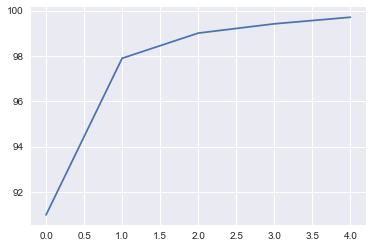

In [128]:
plt.plot(var1)

In [130]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(59381, 132)
(59381, 2)
